# Pythonomics: Intro to economic analysis in Python

*Author: Max Ghenis (mghenis@gmail.com)*

**Topics:**

* Loading data with `pandas`
* Preprocessing data
* Merging data
* Regression with `statsmodels`
* Output to $\LaTeX$ with `stargazer`

**Case study:** Effect of Alaska Permanent Fund Dividend on poverty rate,
as measured by the Supplemental Poverty Measure.
Difference in differences research design.



## How to use this notebook

This is called **Google Colab**, a cloud **Jupyter notebook** editor that 
also connects to Google Drive, supports real-time collaboration and comments, etc.

Notebooks are organized into cells, specifically **Markdown cells** (like this one, also accepts `$\LaTeX$`) and **Code cells** (like the cell below with the `[1]` at the left.

You can run and edit the notebook in Playground mode,
or make a copy to ensure your edits are saved.

Code cells can take any Python code and show the result (for simple commands,
you don't need to `print`, it just shows up).

In [ ]:
1 + 1

2

Try getting your name to show up in the two cells below (note that strings require quotes, either single or double will do).

In [ ]:
# This is a comment. Type your name in quotes below to create the variable.
my_name = 'max'

Now start typing `my_name`, but press Tab after `my`. Colab autocompletes known variables as well as function documentation.

In [ ]:
my_name

'max'

Now add a code cell below this to create and print a variable called `my_hometown` with your hometown as a string; cells can have multiple lines of code each.

In [ ]:
my_hometown = 'Oxnard'
my_hometown

'Oxnard'

## Python basics

**Lists** are defined with square brackets, e.g. `[1, 3, -4]` and `['a', 'b', 'c']`.

This is similar to `c(1, 3, 4)` and `c('a', 'b', 'c')` in `R`.

*You can also put mismatching data types in Python lists,
which makes them similar to R lists,
but in most cases you won't need to do that.*

In [ ]:
l = [1, 3, 4]
l

[1, 3, 4]

You can get a specific element of a list using `list[element_number]` -- but note Python numbering starts at zero!

In [ ]:
l[0]

1

This means it can only be accessed from elements `l[0]`, `l[1]`, and `l[2]`.

We can test whether `l[3]` throws an error using the following code
(this also allows the notebook to continue running, where leaving it as an
error would halt it).

In [ ]:
try:
    l[3]
except:
    print('List l cannot be accessed as l[3]')

List l cannot be accessed as l[3]


You can apply functions to each element of a list with a `for` loop, a technique called *list comprehension*.

*We'll learn more data-analysis ways to do this soon.*

In [ ]:
[i * 2 for i in l]

[2, 6, 8]

## Setup

Python is a vast general-purpose language, so you have to use packages relevant to your field of study.

For tabular data analysis, like what you'd do in R or Python, always
load the `pandas` and `numpy` packages.
`pandas` gives access to R-style `DataFrame`s, and `numpy` is
the vector-math backbone for `pandas` that can also be used for
random number generation, matrix math, logical operations, and more.

![](https://miro.medium.com/max/800/1*9IU5fBzJisilYjRAi-f55Q.png)

(`pandas` actually gets its name from `pan`el `da`ta)

The `import` keyword loads packages.

In [ ]:
import pandas
import numpy

In [ ]:
numpy.exp(1)

2.718281828459045

In [ ]:
numpy.power(3, 2)

9

### Aliases

When loading a package, you can give it an **alias** with the `as` keyword to make it more concise to load.

Widely used packages have canonical aliases, and `pandas` and `numpy` have been
de facto assigned `pd` and `np`, respectively. Try this out here:

(Also try hitting Tab after the `as`!)

In [ ]:
import pandas as pd
import numpy as np

Now you can call functions and constants in the packages using the shorter aliases.

In [ ]:
np.sin(np.pi / 2)

1.0

### Loading modules and functions

*Note: Not needed for today's class, but will be good to know for viewing other Python code.*

Some packages have multiple *modules*, or sets of related functions, which can be loaded separately. For example, `numpy`'s `random` module contains functions
for generating random numbers.

In [ ]:
from numpy import random

You can even import specific functions from packages or modules.
For example, `randn` generates numbers from the standard normal distribution.

In [ ]:
from numpy.random import randn

Now each of these three function calls does the same thing:
generate 10 random numbers from the standard normal distribution.

In [ ]:
randn(10)

array([ 0.27811321, -0.31174521, -1.43363873,  0.61193095,  0.45689309,
       -2.45083453, -2.55392847, -0.77790782, -1.29618122,  0.75594731])

In [ ]:
random.randn(10)

array([-0.32108763, -1.95280137, -0.31010998, -1.53215169, -0.05927515,
        2.29323049, -1.00798007,  0.19447133, -0.83217191,  0.04381867])

In [ ]:
# Type out the third, using the np prefix from before.
# Also try using tab after the dots for code completion and and open parenthesis
# for function documentation.
# ANSWER:
np.random.randn(10)

array([-0.2970314 , -0.35083046,  0.44798046,  0.40383645, -1.0647604 ,
        1.13324067, -2.62734863,  0.52906696, -0.05680495,  2.1949892 ])

## Vector operations in `numpy` and `pandas`

Vector/array operations are integral to scientific computing in Python. Like `gen` in Stata and `apply` in R, `numpy` and `pandas` include rich
sets of vectorized functions to run common code over records quickly.

One way to take advantage of this is to pass lists to `numpy` functions; this often produces a new `array` with the same number of elements.

In [ ]:
np.exp([0, 1, 2])

array([1.        , 2.71828183, 7.3890561 ])

Arrays can be passed into other functions, and aggregated!

In [ ]:
np.exp([0, 1, 2]).sum()

11.107337927389695

**Exercise:** If Jamie invests \$1 per year and gets 5% return each year, how much will they have after 3 years?

Here's a brute-force way, but how can you use lists?

In [ ]:
np.power(1.05, 1) + np.power(1.05, 2) + np.power(1.05, 3)

3.310125

In [ ]:
# Try to do the same more concisely by passing a list to `np.power`.
# ANSWER:
np.power(1.05, [1, 2, 3]).sum()

3.310125

## Exploratory analysis in `pandas`

Time for real data! Let's import data to use in the regression analysis, using the `pandas` `read_csv` function. `read_csv` takes local file paths or URLs, and automatically decompresses files.

Since this is a large file, we'll start by saving the raw file, and then creating a copy to work with. If you mess something up with `cps`, just re-run starting with the `cps = ` cell to avoid re-downloading it.

In [ ]:
cps_raw = pd.read_csv('https://github.com/UBICenter/pfd_spm/raw/master/data/spm_state.csv.gz')

In [ ]:
cps = cps_raw.copy(deep=True)  # This creates a real copy (not a reference).

`cps` is now a `pandas` `DataFrame` object.

We can see the first and last five records by just printing the dataset.

In [ ]:
cps

,year,statefip,age,female,poor,w
0,1967,39,40,True,0,1178.96
1,1967,70,29,False,0,1375.98
2,1967,70,79,True,0,1226.91
3,1967,70,58,False,0,1385.21
4,1967,70,2,True,0,1304.57
...,...,...,...,...,...,...
8192119,2015,20,3,True,0,964.95
8192120,2015,20,40,True,0,1045.34
8192121,2015,20,16,False,0,1001.97
8192122,2015,20,5,True,0,1056.78


This microdata file is a combination of (a) historical Supplemental Poverty Measure (SPM) estimates from the Columbia Center on Poverty and Social Policy, and (b) demographics from the Current Population Survey March Supplement (ASEC) files, from IPUMS. It has the following columns:
* **`year`**: Year; covers 1967 to 2015. (Reporting year, not the following year the survey was administered, as CPS IPUMS defines `year`.)
* **`statefip`**: FIPS code for the respondent's US state of residence.
* **`age`**: Respondent age.
* **`female`**: Whether respondent is female.
* **`poor`**: Whether the respondent's SPM unit (comparable to household) has resources below their SPM poverty threshold.
* **`w`**: Respondent's survey weight.

We can see summary statistics with the `describe` command.

In [ ]:
cps.describe()

,year,statefip,age,poor,w
count,8.192124e+06,8.192124e+06,8.192124e+06,8.192124e+06,8.192070e+06
mean,1.992533e+03,3.098111e+01,3.372562e+01,1.755193e-01,1.520348e+03
std,1.421549e+01,1.932314e+01,2.207534e+01,3.804107e-01,8.664273e+02
min,1.967000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.980000e+03,1.500000e+01,1.500000e+01,0.000000e+00,9.870200e+02
50%,1.993000e+03,3.100000e+01,3.200000e+01,0.000000e+00,1.447940e+03
75%,2.005000e+03,4.200000e+01,5.000000e+01,0.000000e+00,1.880740e+03
max,2.015000e+03,9.900000e+01,9.900000e+01,1.000000e+00,1.998275e+04


***Interpretation question:*** What share of *records* is poor in the dataset? Does this represent the average poverty rate over the period?

ANSWER: 17.55% of records are poor (mean of `poor`).
The average poverty rate will differ, as it will have to be weighted by `w`.

### Working with `pandas` `DataFrame`s

To get a single column from a `DataFrame`, use `df['column_name']`.

In [ ]:
cps['year']

0          1967
1          1967
2          1967
3          1967
4          1967
           ... 
8192119    2015
8192120    2015
8192121    2015
8192122    2015
8192123    2015
Name: year, Length: 8192124, dtype: int64

You can manipulate these directly--no `for` loops needed. For example, here's a column representing $age^2$.

In [ ]:
cps['age'] ** 2

0          1600
1           841
2          6241
3          3364
4             4
           ... 
8192119       9
8192120    1600
8192121     256
8192122      25
8192123    3136
Name: age, Length: 8192124, dtype: int64

The syntax to add or revise a column is the same: `df['column'] = values` (no `<-` like in `R`!).

Since the treatment group is individuals in Alaska, we'll need a flag to identify them. Noting that Alaska is FIPS code 2, let's add this here.

In [ ]:
cps['alaska'] = cps['statefip'] == 2

To select multiple columns, use double-brackets:
`df[['col1', 'col2']]`. This is really telling `pandas`,
"I'm giving you a list of column names, give me a `DataFrame`
with those columns."

Let's use that to check how our `alaska` assignment worked.

In [ ]:
cps[['statefip', 'alaska']]

,statefip,alaska
0,39,False
1,70,False
2,70,False
3,70,False
4,70,False
...,...,...
8192119,20,False
8192120,20,False
8192121,20,False
8192122,20,False


That's not so helpful, given the number of rows.

Instead a good way to check is the `groupby` function.
We don't have time to go through the full power of `groupby`, but let's see one example.

In [ ]:
cps.groupby('alaska')['statefip'].unique()

alaska
False    [39, 70, 42, 9, 36, 34, 29, 17, 71, 72, 73, 18...
True                                                   [2]
Name: statefip, dtype: object

...and one more fun one to show inline Jupyter plots.

*Note: This is not the poverty rate since it's not weighted!*

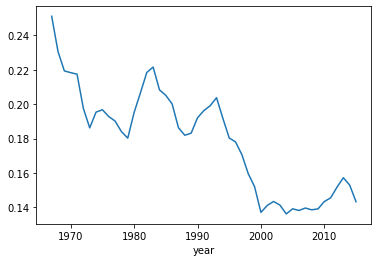

In [ ]:
cps.groupby('year')['poor'].mean().plot()

***Exercise:*** Add three new columns to `cps` for the regression:
1. **`age2`** for $age^2$
2. **`post`** for the post period (the Permanent Fund Dividend was introduced in 1982)
3. **`alaska_post`** for the DD variable (hint: since those are both `True`/`False` rather than 0/1, use the `&` operator instead of `*`)

In [ ]:
# Add age2, post, and alaska_post here:
# ANSWER:
cps['age2'] = cps.age ** 2
cps['post'] = cps.year >= 1982
cps['alaska_post'] = cps.post & cps.alaska

### Filtering data

The last thing we want to do before running regressions is
filtering `DataFrame`s. Doing this is similar to selecting specific columns, but in this case we want to pass a `True`/`False` vector to the square brackets. For example, here are all the people in Alaska:

In [ ]:
cps[cps['alaska']]

,year,statefip,age,female,poor,w,alaska,age2,post,alaska_post
1352508,1976,2,49,False,0,135.30,True,2401,False,False
1352509,1976,2,10,True,0,135.57,True,100,False,False
1352510,1976,2,12,True,0,134.71,True,144,False,False
1352511,1976,2,16,True,0,132.84,True,256,False,False
1352512,1976,2,17,False,0,160.27,True,289,False,False
...,...,...,...,...,...,...,...,...,...,...
8067492,2015,2,64,False,0,427.64,True,4096,True,True
8067493,2015,2,58,True,0,197.37,True,3364,True,True
8067494,2015,2,23,False,0,478.72,True,529,True,True
8067495,2015,2,22,False,0,501.55,True,484,True,True


We could do a DD with the full dataset, but
we'd probably want year fixed effects if we did. Instead, let's just filter for first year of the Permanent Fund Dividend, and the year before that (1981 and 1982), using the `isin` function, and make it a new `DataFrame`.

In [ ]:
cps8182 = cps[cps['year'].isin([1981, 1982])]

## Regressions in `statsmodels`

`statsmodels` is the primary Python package for statistical analysis like regression. We'll start by loading the `api` module, which provides a common way of specifying regressions.

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We'll use the `WLS` function for weighted least squares, since our survey data is weighted. Let's see what that looks like with tab completion

In [ ]:
# Type sm.WLS( and hit tab to see the documentation.

OK, so the first argument is the outcome, for us that'll be poverty status. The second is the regressors, and the third will be the weights.

We're going to try something that will throw an error, so we'll use the `try`/`except` statement to ensure the notebook can fully run, this time also printing the error message we'd have gotten.

In [ ]:
try:
    sm.WLS(cps8182['poor'], cps8182[['alaska', 'post', 'alaska_post']],
           cps8182['w'])
except Exception as e:
    print(e)

numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


Huh, that's a weird error. Let's use the `SEARCH STACK OVERFLOW` feature to find a solution (only shows up in Colab if removing the `try`/`except` structure).

...

...

OK, let's multiply it by 1 to transform bools to integers and try again.

In [ ]:
cps8182 *= 1

In [ ]:
sm.WLS(cps8182['poor'], cps8182[['alaska', 'post', 'alaska_post']],
       cps8182['w'])

No error! But this just constructs the model, we now have to fit it.

Let's save the fitted model as an object.

In [ ]:
dd = sm.WLS(cps8182['poor'], cps8182[['alaska_post', 'alaska', 'post']],
            cps8182['w']).fit()

To see the results, use `.summary()`.

In [ ]:
dd.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:740: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                   poor   R-squared (uncentered):                   0.108
Model:                            WLS   Adj. R-squared (uncentered):              0.108
Method:                 Least Squares   F-statistic:                          1.315e+04
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:47:06   Log-Likelihood:                            -inf
No. Observations:              324822   AIC:                                        inf
Df Residuals:                  324819   BIC:                                        inf
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
alaska_post    -0.2049      0.035     -5.830      0.000      -0.274      -0.136
alaska          0.1702      0.025      6.735      0.000       0.121       0.220
post            0.2099      0.001    198.363      0.000       0.208       0.212
==============================================================================
Omnibus:                    73623.253   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134763.634
Skew:                           1.493   Prob(JB):                         0.00
Kurtosis:                       4.022   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice anything missing?

One last step (for real!):

In [ ]:
cps8182 = sm.add_constant(cps8182)

In [ ]:
dd = sm.WLS(cps8182['poor'], cps8182[['alaska_post', 'alaska', 'post', 'const']],
            cps8182['w']).fit()

dd.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:740: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   poor   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     19.83
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           7.61e-13
Time:                        16:47:06   Log-Likelihood:                   -inf
No. Observations:              324822   AIC:                               inf
Df Residuals:                  324818   BIC:                               inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
alaska_post    -0.0056      0.033     -0.167      0.867      -0.071       0.060
alaska         -0.0292      0.024     -1.221      0.222      -0.076       0.018
post            0.0106      0.001      7.468      0.000       0.008       0.013
const           0.1993      0.001    198.459      0.000       0.197       0.201
==============================================================================
Omnibus:                    75086.573   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           138951.112
Skew:                           1.553   Prob(JB):                         0.00
Kurtosis:                       3.790   Cond. No.                         62.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's add some controls.

In [ ]:
dd_controls = sm.WLS(cps8182['poor'], 
                     cps8182[['alaska_post', 'alaska', 'post',
                              'female', 'age', 'age2', 'const']],
                     cps8182['w']).fit()

dd_controls.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:740: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   poor   R-squared:                       0.023
Model:                            WLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1271.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:47:06   Log-Likelihood:                   -inf
No. Observations:              324822   AIC:                               inf
Df Residuals:                  324815   BIC:                               inf
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
alaska_post    -0.0034      0.033     -0.103      0.918      -0.068       0.061
alaska         -0.0334      0.024     -1.415      0.157      -0.080       0.013
post            0.0107      0.001      7.665      0.000       0.008       0.013
female          0.0378      0.001     26.963      0.000       0.035       0.041
age            -0.0087      0.000    -77.068      0.000      -0.009      -0.008
age2         9.145e-05    1.4e-06     65.106      0.000    8.87e-05    9.42e-05
const           0.3245      0.002    152.866      0.000       0.320       0.329
==============================================================================
Omnibus:                    72868.469   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132488.690
Skew:                           1.508   Prob(JB):                         0.00
Kurtosis:                       3.830   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Publication-grade regression tables in `stargazer`

`stargazer` is a popular R package for creating $\LaTeX$ regression tables,
which has now been (mostly) ported to Python.

To install the latest version, go straight to GitHub (also available other ways).

In [ ]:
try:
    import stargazer
except ImportError:
    !pip install git+https://github.com/mwburke/stargazer.git    

  Cloning https://github.com/mwburke/stargazer.git to /tmp/pip-req-build-ayt5t14p
  Running command git clone -q https://github.com/mwburke/stargazer.git /tmp/pip-req-build-ayt5t14p
  Created wheel for stargazer: filename=stargazer-0.0.4-cp36-none-any.whl size=9030 sha256=695dfcf58d4c5d347b2a4d0a9cf59b7fae6805a6e4470c94fe72ab40f072a47f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2l2rek1v/wheels/d5/7a/9d/9694f1decadbb05f32051c4e1a03544cf61a5d27f3e3d86530
Successfully built stargazer


In [ ]:
from stargazer import stargazer as sg

In [ ]:
sg.Stargazer([dd, dd_controls])

In [ ]:
sg.Stargazer([dd, dd_controls]).render_latex()

'\\begin{table}[!htbp] \\centering\n  \\label{}\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{2}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{2-3}\n\\\\[-1.8ex] & (1) & (2) \\\\\n\\hline \\\\[-1.8ex]\n age & & -0.009$^{***}$ \\\\\n  & & (0.000) \\\\\n age2 & & 0.000$^{***}$ \\\\\n  & & (0.000) \\\\\n alaska & -0.029$^{}$ & -0.033$^{}$ \\\\\n  & (0.024) & (0.024) \\\\\n alaska_post & -0.006$^{}$ & -0.003$^{}$ \\\\\n  & (0.033) & (0.033) \\\\\n const & 0.199$^{***}$ & 0.324$^{***}$ \\\\\n  & (0.001) & (0.002) \\\\\n female & & 0.038$^{***}$ \\\\\n  & & (0.001) \\\\\n post & 0.011$^{***}$ & 0.011$^{***}$ \\\\\n  & (0.001) & (0.001) \\\\\n\\hline \\\\[-1.8ex]\n Observations & 324822 & 324822 \\\\\n $R^2$ & 0.000 & 0.023 \\\\\n Adjusted $R^2$ & 0.000 & 0.023 \\\\\n Residual Std. Error & 15.115(df = 324818) & 14.942(df = 324815)  \\\\\n F Statistic & 19.827$^{***}$ (df = 3.0; 324818.0) & 1270.719$^{***}$ (df = 6.0; 324815.0) \\\